In [ ]:
# Copied from paper numbers v2

In [21]:
import pandas
import gripql

pandas.options.display.max_rows = 1000

SERVER = "https://exa.compbio.ohsu.edu/bmeg-etl"
GRAPH = 'rc6'
CRED_FILE=None

OUTDATA = {}

In [22]:
gripql.__file__

'/Users/karlberb/anaconda3/lib/python3.7/site-packages/gripql/__init__.py'

In [23]:
gripql.__version__

'0.7.0'

In [24]:
G = gripql.Graph(url=SERVER, graph=GRAPH, credential_file=CRED_FILE)

In [25]:
type(G)

gripql.graph.Graph

In [26]:
def aggTable(q): # input q into function
    o = {} # create empty dictionary
    res = list(q) # create list from function input q, q is the whole query!
    for b in res: # iterate through list of input
        o[b["key"]] = b["value"] # in dict o, add the key and value associated with b
    return pandas.Series(o) # create series from dictionary o

In [14]:
PROJECTS = [
    "Project:PRISM",
    "Project:CTRPv2",
    "Project:GDSC1000",
    "Project:GRAY",
    "Project:FIMM",
    "Project:CCLE-NP",
    "Project:gCSI"
]

In [15]:
G.query().V("Project:PRISM").execute()

[{'gid': 'Project:PRISM',
  'label': 'Project',
  'data': {'project_id': 'Project:PRISM', 'submitter_id': None}}]

In [ ]:
G.query().V("Project:CTRPv2").execute()

In [ ]:
G.query().V("Project:GDSC1000").execute()

In [ ]:
G.query().V("Project:CCLE-NP").execute()

In [19]:
# test function assignment
test_o = aggTable(G.query().V().hasLabel("DrugResponse").aggregate(gripql.term("count", "project_id")))

In [20]:
test_o

Project:PRISM        2500097
Project:CTRPv2        367742
Project:GDSC1000      204958
Project:CCLE-NP        11600
Project:gCSI            6434
Project:GRAY            4456
Project:FIMM            2561
Project:UHNBreast         52
dtype: int64

In [51]:
count = 0
for nmbr in test_o:
    count = count + nmbr
#     print(nmbr)

In [52]:
count

3097900

In [27]:
# Rerun from below, 2021-05-14
aggTable(G.query().V().hasLabel("DrugResponse").aggregate(gripql.term("count", "project_id")))

Project:PRISM        2500097
Project:CTRPv2        367742
Project:GDSC1000      204958
Project:CCLE-NP        11600
Project:gCSI            6434
Project:GRAY            4456
Project:FIMM            2561
Project:UHNBreast         52
dtype: int64

In [53]:
aggTable(G.query().V().hasLabel("DrugResponse").aggregate(gripql.term("count", "project_id")))

Project:PRISM        2500097
Project:CTRPv2        367742
Project:GDSC1000      204958
Project:CCLE-NP        11600
Project:gCSI            6434
Project:GRAY            4456
Project:FIMM            2561
Project:UHNBreast         52
dtype: int64

In [28]:
# Experiment counts
expCounts = aggTable(G.query().V().hasLabel("DrugResponse").aggregate(gripql.term("count", "project_id")))
OUTDATA['TOTAL:exp_counts'] = expCounts.sum()
for p in PROJECTS:
    OUTDATA[p + ":exp_counts"] = expCounts[p]

In [56]:
expCounts

Project:PRISM        2500097
Project:CTRPv2        367742
Project:GDSC1000      204958
Project:CCLE-NP        11600
Project:gCSI            6434
Project:GRAY            4456
Project:FIMM            2561
Project:UHNBreast         52
dtype: int64

In [55]:
OUTDATA

{'TOTAL:exp_counts': 3097900,
 'Project:PRISM:exp_counts': 2500097,
 'Project:CTRPv2:exp_counts': 367742,
 'Project:GDSC1000:exp_counts': 204958,
 'Project:GRAY:exp_counts': 4456,
 'Project:FIMM:exp_counts': 2561,
 'Project:CCLE-NP:exp_counts': 11600,
 'Project:gCSI:exp_counts': 6434}

In [61]:
# compounds per project
t = aggTable(G.query().V().hasLabel("Project").as_("p").out("compounds").as_("c").distinct(["$p.project_id", "$c._gid"]).select("p").aggregate(gripql.term("count", "$._gid")))
for p in PROJECTS:
    OUTDATA[p + ":compound_count"] = t[p]

In [62]:
t

Project:PRISM        4197
Project:CTRPv2        361
Project:GDSC1000      209
Project:GRAY           74
Project:TCGA-GBM       71
Project:TCGA-OV        56
Project:TCGA-BRCA      53
Project:FIMM           52
Project:TCGA-SKCM      46
Project:TCGA-LGG       36
Project:TCGA-SARC      31
Project:TCGA-STAD      30
Project:TCGA-LUSC      29
Project:TCGA-DLBC      28
Project:TCGA-KIRC      26
Project:TCGA-BLCA      25
Project:TCGA-LUAD      24
Project:CCLE-NP        24
Project:TCGA-HNSC      24
Project:TCGA-UCEC      22
Project:TCGA-MESO      21
Project:TCGA-CESC      21
Project:TCGA-PAAD      18
Project:TCGA-COAD      18
Project:TCGA-KIRP      17
Project:gCSI           16
Project:TCGA-READ      15
Project:TCGA-PRAD      15
Project:TCGA-LIHC      15
Project:TCGA-ESCA      12
Project:TCGA-ACC       11
Project:TCGA-UCS       10
Project:TCGA-THYM       9
Project:TCGA-PCPG       6
Project:TCGA-TGCT       6
Project:TCGA-KICH       6
Project:TCGA-THCA       4
Project:UHNBreast       4
Project:TCGA

In [15]:
G.query().V(PROJECTS).out("cases").aggregate(gripql.term("count", "project_id"))

In [13]:
list(G.query().V().hasLabel("Project").render(["$._gid","$._label","$._data"]).limit(1))

[['Project:GTEx_Cervix Uteri',
  'Project',
  {'project_id': 'GTEx_Cervix Uteri', 'submitter_id': None}]]

In [ ]:
# PROJECTS is a list of projects

In [23]:
list(G.query().V("Project:CCLE-NP").out("cases").limit(1))

[{'gid': 'Case:CCLE-NP:ACH-001015',
  'label': 'Case',
  'data': {'case_id': 'Case:CCLE-NP:ACH-001015',
   'project_id': 'Project:CCLE-NP',
   'projects': ['Project:CCLE-NP'],
   'submitter_id': 'CCLE-NP:ACH-001015'}}]

In [22]:
list(G.query().V("Project:GDSC1000").out("cases").limit(1))

[{'gid': 'Case:GDSC1000:ACH-000200',
  'label': 'Case',
  'data': {'case_id': 'Case:GDSC1000:ACH-000200',
   'project_id': 'Project:GDSC1000',
   'projects': ['Project:GDSC1000'],
   'submitter_id': 'GDSC1000:ACH-000200'}}]

In [21]:
list(G.query().V("Project:CTRPv2").out("cases").limit(1))

[{'gid': 'Case:CTRPv2:ACH-000212',
  'label': 'Case',
  'data': {'case_id': 'Case:CTRPv2:ACH-000212',
   'project_id': 'Project:CTRPv2',
   'projects': ['Project:CTRPv2'],
   'submitter_id': 'CTRPv2:ACH-000212'}}]

In [112]:
type(project_to_cases_edge)

gripql.query.Query

In [85]:
project_to_cases_edge = G.query().V("Project:PRISM").out("cases")

In [115]:
project_to_cases_edge = list(G.query().V("Project:PRISM").out("cases"))

In [137]:
def get_prj_cll_lns(project_to_cases_edge):
    prj_cll_lns = collections.defaultdict(list)
    for gid_val in project_to_cases_edge:
        prj_cll_ln = gid_val['gid'].split(':')[1:3]
        prj_cll_lns[prj_cll_ln[0]].append(prj_cll_ln[1])
    return(prj_cll_lns)    

In [138]:
prj_cll_lns = get_prj_cll_lns(project_to_cases_edge)

NameError: name 'collections' is not defined

In [127]:
type(prj_cll_lns)

dict

In [136]:
prj_cll_lns

{'PRISM': 'ACH-000040'}

In [ ]:
a_dict = {}
if "a" in a_dict:
  a_dict["a"].append("hello")
else:
  a_dict["a"] = ["hello"]
print(a_dict)

In [139]:
type(project_to_cases_edge)

list

In [140]:
len(project_to_cases_edge)

568

In [ ]:
prj_cll_ln_dict = {}
for gid_val in project_to_cases_edge:
    prj_cll_ln = gid_val['gid'].split(':')[1:3]
    #print(prj_cll_ln)
    prj = prj_cll_ln[0]
    #print(prj)
    cl_ln = prj_cll_ln[1]
    if prj in prj_cll_ln_dict:
        #print('yes')
        prj_cll_ln_dict[prj].append(cl_ln)
    else:
        prj_cll_ln_dict[prj] = [cl_ln]
    #break

In [150]:
len(prj_cll_ln_dict)

1

In [99]:
from upsetplot import from_memberships

In [152]:
def get_cllns(edge_list):
    prj_cll_ln_dict = {}
    for gid_val in project_to_cases_edge:
        prj_cll_ln = gid_val['gid'].split(':')[1:3]
        prj = prj_cll_ln[0]
        cl_ln = prj_cll_ln[1]
        if prj in prj_cll_ln_dict:
            prj_cll_ln_dict[prj].append(cl_ln)
        else:
            prj_cll_ln_dict[prj] = [cl_ln]
    return(prj_cll_ln_dict)

In [157]:
cll_ln_lst = []
for prj in PROJECTS:
    print(prj)
    project_to_cases_edge = list(G.query().V(prj).out("cases"))
    cell_lines = get_cllns(project_to_cases_edge)
    cll_ln_lst.append(cell_lines)    

Project:PRISM
Project:CTRPv2
Project:GDSC1000
Project:GRAY
Project:FIMM
Project:CCLE-NP
Project:gCSI


In [164]:
ls

Cell_line_upset.ipynb
RC6_Out_DF.tsv
RC6_eda.ipynb
RC6_eda_v2.ipynb
RC6_eda_v3.ipynb
RFE.ipynb
Road Map.docx
TieDIE paper.pdf
Transcriptome Network Diffusion Drug Response.docx
Tutorial TIEDIE.pdf
Untitled.ipynb
cell_lines.tsv
network_diffusion/
output.tsv
paper_numbers.ipynb
upset_plot.ipynb


In [161]:
import csv        

data = ['text1', 'text2', 'text3', 'text4']    

with open('output.tsv', 'w', newline='') as f_output:
    tsv_output = csv.writer(f_output, delimiter='\t')
    tsv_output.writerow(data)

In [159]:
cll_ln_lst[6]

{'gCSI': ['ACH-000222',
  'ACH-000783',
  'ACH-000457',
  'ACH-000548',
  'ACH-000107',
  'ACH-002345',
  'ACH-001000',
  'ACH-000456',
  'ACH-000248',
  'ACH-000046',
  'ACH-000052',
  'ACH-000948',
  'ACH-001306',
  'ACH-000649',
  'ACH-000838',
  'ACH-000269',
  'ACH-000940',
  'ACH-001451',
  'ACH-000392',
  'ACH-000880',
  'ACH-000009',
  'ACH-000257',
  'ACH-000508',
  'ACH-000288',
  'ACH-000927',
  'ACH-000256',
  'ACH-001048',
  'ACH-000120',
  'ACH-000998',
  'ACH-000334',
  'ACH-000207',
  'ACH-000786',
  'ACH-000138',
  'ACH-000056',
  'ACH-000749',
  'ACH-000979',
  'ACH-002236',
  'ACH-000877',
  'ACH-000644',
  'ACH-000925',
  'ACH-000435',
  'ACH-000330',
  'ACH-000585',
  'ACH-000936',
  'ACH-001064',
  'ACH-000906',
  'ACH-001023',
  'ACH-001336',
  'ACH-000867',
  'ACH-000555',
  'ACH-000329',
  'ACH-000805',
  'ACH-001024',
  'ACH-002003',
  'ACH-000582',
  'ACH-000864',
  'ACH-000401',
  'ACH-001328',
  'ACH-000202',
  'ACH-001065',
  'ACH-000681',
  'ACH-002219',


In [170]:
cll_ln_lst

[{'PRISM': ['ACH-000589',
   'ACH-000086',
   'ACH-000748',
   'ACH-000545',
   'ACH-000762',
   'ACH-000940',
   'ACH-001318',
   'ACH-000805',
   'ACH-000108',
   'ACH-000323',
   'ACH-000903',
   'ACH-000098',
   'ACH-000324',
   'ACH-000164',
   'ACH-000650',
   'ACH-000217',
   'ACH-000476',
   'ACH-000396',
   'ACH-000332',
   'ACH-000570',
   'ACH-000178',
   'ACH-000012',
   'ACH-000651',
   'ACH-000839',
   'ACH-000191',
   'ACH-000532',
   'ACH-000008',
   'ACH-000316',
   'ACH-000941',
   'ACH-000375',
   'ACH-000619',
   'ACH-000965',
   'ACH-000210',
   'ACH-000677',
   'ACH-000967',
   'ACH-000803',
   'ACH-000007',
   'ACH-000719',
   'ACH-000484',
   'ACH-000433',
   'ACH-000688',
   'ACH-000153',
   'ACH-000429',
   'ACH-000096',
   'ACH-000628',
   'ACH-000824',
   'ACH-000599',
   'ACH-000939',
   'ACH-000219',
   'ACH-000054',
   'ACH-000302',
   'ACH-000510',
   'ACH-000549',
   'ACH-000463',
   'ACH-000788',
   'ACH-000537',
   'ACH-000312',
   'ACH-000390',
   'A

In [ ]:
import json

In [173]:
with open('cell_lines_json', 'w') as f_out:
    json.dump(cll_ln_lst, fout)

In [175]:
with open('cell_lines_json', 'r') as f_in:
    for line in f_in:
        in_list = json.loads(line)

In [176]:
in_list

[{'PRISM': ['ACH-000589',
   'ACH-000086',
   'ACH-000748',
   'ACH-000545',
   'ACH-000762',
   'ACH-000940',
   'ACH-001318',
   'ACH-000805',
   'ACH-000108',
   'ACH-000323',
   'ACH-000903',
   'ACH-000098',
   'ACH-000324',
   'ACH-000164',
   'ACH-000650',
   'ACH-000217',
   'ACH-000476',
   'ACH-000396',
   'ACH-000332',
   'ACH-000570',
   'ACH-000178',
   'ACH-000012',
   'ACH-000651',
   'ACH-000839',
   'ACH-000191',
   'ACH-000532',
   'ACH-000008',
   'ACH-000316',
   'ACH-000941',
   'ACH-000375',
   'ACH-000619',
   'ACH-000965',
   'ACH-000210',
   'ACH-000677',
   'ACH-000967',
   'ACH-000803',
   'ACH-000007',
   'ACH-000719',
   'ACH-000484',
   'ACH-000433',
   'ACH-000688',
   'ACH-000153',
   'ACH-000429',
   'ACH-000096',
   'ACH-000628',
   'ACH-000824',
   'ACH-000599',
   'ACH-000939',
   'ACH-000219',
   'ACH-000054',
   'ACH-000302',
   'ACH-000510',
   'ACH-000549',
   'ACH-000463',
   'ACH-000788',
   'ACH-000537',
   'ACH-000312',
   'ACH-000390',
   'A

In [156]:
type(cell_lines)

dict

In [163]:
with open('cell_lines.tsv', 'w', newline='') as f_output:
    tsv_output = csv.writer(f_output, delimiter='\t')
    tsv_output.writerow(cll_ln_lst)

In [ ]:
# Read flat list from tsv

In [171]:
with open('cell_lines.tsv') as f:
    flt_lst = [line.strip() for line in f]

In [172]:
flt_lst

["{'PRISM': ['ACH-000589', 'ACH-000086', 'ACH-000748', 'ACH-000545', 'ACH-000762', 'ACH-000940', 'ACH-001318', 'ACH-000805', 'ACH-000108', 'ACH-000323', 'ACH-000903', 'ACH-000098', 'ACH-000324', 'ACH-000164', 'ACH-000650', 'ACH-000217', 'ACH-000476', 'ACH-000396', 'ACH-000332', 'ACH-000570', 'ACH-000178', 'ACH-000012', 'ACH-000651', 'ACH-000839', 'ACH-000191', 'ACH-000532', 'ACH-000008', 'ACH-000316', 'ACH-000941', 'ACH-000375', 'ACH-000619', 'ACH-000965', 'ACH-000210', 'ACH-000677', 'ACH-000967', 'ACH-000803', 'ACH-000007', 'ACH-000719', 'ACH-000484', 'ACH-000433', 'ACH-000688', 'ACH-000153', 'ACH-000429', 'ACH-000096', 'ACH-000628', 'ACH-000824', 'ACH-000599', 'ACH-000939', 'ACH-000219', 'ACH-000054', 'ACH-000302', 'ACH-000510', 'ACH-000549', 'ACH-000463', 'ACH-000788', 'ACH-000537', 'ACH-000312', 'ACH-000390', 'ACH-000901', 'ACH-000289', 'ACH-000307', 'ACH-000733', 'ACH-000268', 'ACH-000309', 'ACH-001307', 'ACH-000758', 'ACH-000693', 'ACH-000427', 'ACH-000684', 'ACH-000716', 'ACH-00

In [167]:
lst_in = pd.read_csv('cell_lines.tsv', sep = '\t')

In [168]:
type(lst_in)

pandas.core.frame.DataFrame

In [169]:
lst_in

,"{'GRAY': ['ACH-000828', 'ACH-001396', 'ACH-000759', 'ACH-001389', 'ACH-002331', 'ACH-000930', 'ACH-002328', 'ACH-000725', 'ACH-000276', 'ACH-000859', 'ACH-001827', 'ACH-000212', 'ACH-000818', '', 'ACH-000902', 'ACH-000857', 'ACH-000117', 'ACH-000330', 'ACH-002320', 'ACH-000668', 'ACH-000699', 'ACH-001388', 'ACH-000277', 'ACH-000288', 'ACH-001395', 'ACH-000783', 'ACH-000573', 'ACH-000374', 'ACH-002325', 'ACH-001394', 'ACH-000019', 'ACH-000768', 'ACH-002327', 'ACH-000621', 'ACH-001357', 'ACH-000876', 'ACH-000147', 'ACH-001391', 'ACH-000568', 'ACH-000044', 'ACH-000536', 'ACH-000910', 'ACH-000097', 'ACH-001390', 'ACH-000017', 'ACH-000934', 'ACH-000148', 'ACH-001392', 'ACH-000624', 'ACH-000849', 'ACH-000554', 'ACH-000111', 'ACH-000927', 'ACH-000711', 'ACH-000223', 'ACH-002321', 'ACH-002322', 'ACH-000352', 'ACH-000248', 'ACH-001397', 'ACH-002324', 'ACH-002319']}","{'FIMM': ['ACH-000006', 'ACH-000146', 'ACH-000927', 'ACH-000817', 'ACH-000112', 'ACH-000573', 'ACH-000132', 'ACH-001819', 'ACH-000719', 'ACH-000097', 'ACH-000849', 'ACH-000910', 'ACH-000902', 'ACH-000857', 'ACH-000643', 'ACH-000811', 'ACH-000223', 'ACH-000288', 'ACH-000147', 'ACH-000148', 'ACH-000196', 'ACH-000019', 'ACH-000374', 'ACH-000696', 'ACH-000017', 'ACH-000768', 'ACH-000258', 'ACH-000212', 'ACH-001738', 'ACH-000551', 'ACH-000113', 'ACH-000966', 'ACH-001129', 'ACH-000168', 'ACH-000045', 'ACH-000065', 'ACH-000856', 'ACH-001151', 'ACH-000906', 'ACH-000373', 'ACH-000001', 'ACH-000617', 'ACH-000386', 'ACH-000291', 'ACH-002149', 'ACH-000263', 'ACH-000090', 'ACH-000081', 'ACH-002273', '']}"


In [166]:
import pandas as pd

In [178]:
# make overall list
def intersection(lst1, lst2):
    lst3 = [value for value in lst1 if value in lst2]
    return lst3

In [200]:
combined_list = []
for prj in cll_ln_lst:
#     print(prj)
#     cell_lines = list(prj.values())[0]
#     combined_list.append(list(prj.values())[0]) # length 7
    combined_list = combined_list + list(prj.values())[0]
#     cell_lines = prj.items()
#     break

In [ ]:
combined_list = []
for prj in cll_ln_lst:
    combined_list = combined_list + list(prj.values())[0]

In [201]:
len(combined_list)

3446

In [202]:
combined_set = set(combined_list)

In [205]:
cmb_lst = list(combined_set)

In [203]:
len(combined_set)

1321

In [228]:
for prj in cll_ln_lst:
    print(list(prj.keys())[0])
    print(len(list(prj.values())[0]))
    prj_list = list(prj.values())[0]
    intersection = list(set(prj_list) & set(cmb_lst))
    print(len(intersection))

PRISM
568
568
CTRPv2
845
845
GDSC1000
1013
1013
GRAY
62
62
FIMM
50
50
CCLE-NP
501
501
gCSI
407
407


In [231]:
for i in cll_ln_lst:
    prj_list = list(prj.values())[0]
    lst3 = [value for value in prj_list if value in cmb_lst]
    print(len(lst3))

407
407
407
407
407
407
407


In [ ]:
A.intersection(*other_sets)

In [232]:
A = [1,2,3,4]
B = [3,4,5,6,7]
C = [5,6,7,8,9]
D = [7,8,9,10,11,12]

In [233]:
import itertools

In [235]:
print(list(itertools.combinations('123', 2)))

[('1', '2'), ('1', '3'), ('2', '3')]


In [236]:
print(list(itertools.combinations('ABCD', 2)))

[('A', 'B'), ('A', 'C'), ('A', 'D'), ('B', 'C'), ('B', 'D'), ('C', 'D')]


In [237]:
len(list(itertools.combinations('ABCDE', 2)))

10

In [238]:
len(list(itertools.combinations('ABCDEF', 2)))

15

In [239]:
len(list(itertools.combinations('ABCDEFG', 2)))

21

In [240]:
len(list(itertools.combinations('ABCDEFG', 3)))

35

In [241]:
len(list(itertools.combinations('ABCDEFG', 4)))

35

In [244]:
print(list(itertools.combinations('ABCDEFG', 4)))

[('A', 'B', 'C', 'D'), ('A', 'B', 'C', 'E'), ('A', 'B', 'C', 'F'), ('A', 'B', 'C', 'G'), ('A', 'B', 'D', 'E'), ('A', 'B', 'D', 'F'), ('A', 'B', 'D', 'G'), ('A', 'B', 'E', 'F'), ('A', 'B', 'E', 'G'), ('A', 'B', 'F', 'G'), ('A', 'C', 'D', 'E'), ('A', 'C', 'D', 'F'), ('A', 'C', 'D', 'G'), ('A', 'C', 'E', 'F'), ('A', 'C', 'E', 'G'), ('A', 'C', 'F', 'G'), ('A', 'D', 'E', 'F'), ('A', 'D', 'E', 'G'), ('A', 'D', 'F', 'G'), ('A', 'E', 'F', 'G'), ('B', 'C', 'D', 'E'), ('B', 'C', 'D', 'F'), ('B', 'C', 'D', 'G'), ('B', 'C', 'E', 'F'), ('B', 'C', 'E', 'G'), ('B', 'C', 'F', 'G'), ('B', 'D', 'E', 'F'), ('B', 'D', 'E', 'G'), ('B', 'D', 'F', 'G'), ('B', 'E', 'F', 'G'), ('C', 'D', 'E', 'F'), ('C', 'D', 'E', 'G'), ('C', 'D', 'F', 'G'), ('C', 'E', 'F', 'G'), ('D', 'E', 'F', 'G')]


In [247]:
fourth_order = list(itertools.combinations('ABCDEFG', 4))

In [248]:
fourth_order[0]

('A', 'B', 'C', 'D')

In [253]:
for i in fourth_order[0]:
    print(eval(i))

[1, 2, 3, 4]
[3, 4, 5, 6, 7]
[5, 6, 7, 8, 9]
[7, 8, 9, 10, 11, 12]


In [242]:
len(list(itertools.combinations('ABCDEFG', 5)))

21

In [243]:
len(list(itertools.combinations('ABCDEFG', 6)))

7

In [ ]:
for prj in cll_ln_lst:

In [215]:
mlt_ndx_srs = from_memberships(
    [
    ['PRISM'],
    ['CTRPv2'],
    ['GDSC1000'],
    ['GRAY'],
    ['FIMM'],
    ['CCLE-NP'],
    ['gCSI']
    ],
    data = [568, 845, 1013, 62, 50, 501, 407]
)

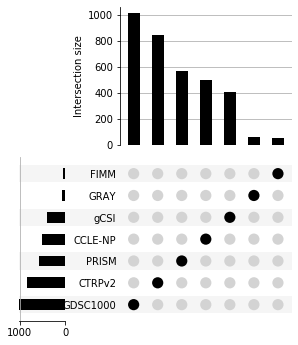

In [216]:
plot(mlt_ndx_srs)
from matplotlib import pyplot
pyplot.show()

In [220]:
import math

In [221]:
math.factorial(3)

6

In [222]:
math.factorial(4)

24

In [223]:
math.factorial(5)

120

In [225]:
math.factorial(6)

720

In [226]:
math.factorial(7)

5040

In [103]:
mlt_ndx_srs = from_memberships(
    [
    ['prj_a', 'prj_b'],
    ['prj_a', 'prj_c'],
    ],
    data = [10, 15]
)

In [104]:
mlt_ndx_srs

prj_a  prj_b  prj_c
True   True   False    10
       False  True     15
dtype: int64

In [106]:
from upsetplot import plot

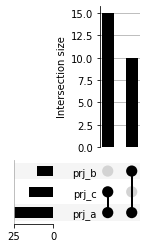

In [108]:
plot(mlt_ndx_srs)
from matplotlib import pyplot
pyplot.show()

In [84]:
len(list(G.query().V("Project:PRISM").out("cases")))

568

In [18]:
list(G.query().V("Project:PRISM").out("cases").limit(1))

[{'gid': 'Case:PRISM:ACH-000589',
  'label': 'Case',
  'data': {'case_id': 'ACH-000589',
   'cellline_attributes': {'Achilles_n_replicates': '3.0',
    'CCLE_Name': 'NCIH1437_LUNG',
    'COSMICID': '687794.0',
    'DepMap_ID': 'ACH-000589',
    'RRID': 'CVCL_1472',
    'Sanger_Model_ID': 'SIDM00734',
    'Subtype': 'Non-Small Cell Lung Cancer (NSCLC), Adenocarcinoma',
    'age': '60',
    'cas9_activity': '9.2',
    'cell_line_NNMD': '-4.6341337',
    'culture_medium': 'RPMI + 10% FBS',
    'culture_type': 'Adherent',
    'lineage': 'lung',
    'lineage_sub_subtype': 'NSCLC_adenocarcinoma',
    'lineage_subtype': 'NSCLC',
    'primary_disease': 'Lung Cancer',
    'primary_or_metastasis': 'Metastasis',
    'sample_collection_site': 'pleural_effusion',
    'sex': 'Male',
    'source': 'ATCC',
    'stripped_cell_line_name': 'NCIH1437'},
   'project_id': 'Project:PRISM',
   'submitter_id': 'ACH-000589'}}]

In [25]:
type(t)

pandas.core.series.Series

In [30]:
t.items

<bound method Series.items of Project:GDSC1000    1013
Project:CTRPv2       845
Project:PRISM        568
Project:CCLE-NP      501
Project:gCSI         407
Project:GRAY          62
Project:FIMM          50
dtype: int64>

In [28]:
for k, v in t.items():
    print(k,v)
    break
    OUTDATA[k + ":cell_count"] = v

Project:GDSC1000 1013


In [26]:
t

Project:GDSC1000    1013
Project:CTRPv2       845
Project:PRISM        568
Project:CCLE-NP      501
Project:gCSI         407
Project:GRAY          62
Project:FIMM          50
dtype: int64

In [66]:
proj_list=[]
for i in samples:
    print(i)
    break
    #print(i[1]['project_id'])
    proj_list.append(i[1]['project_id'])
    #break

['Sample:GTEX-111CU-2026-SM-5GZZC', {'gtex_attributes': {'SAMPID': 'GTEX-111CU-2026-SM-5GZZC', 'SM350NRM': '', 'SM550NRM': '', 'SMAFRZE': 'RNASEQ', 'SMALTALG': '11147990.0', 'SMATSSCR': '1.0', 'SMBSMMRT': '0.0024203525', 'SMCENTER': 'B1', 'SMCGLGTH': '', 'SMCHMPRS': '0.0', 'SMDPMPRT': '0.0', 'SME1ANTI': '17444619.0', 'SME1MMRT': '0.0019260306', 'SME1MPRT': '0.9952557', 'SME1PCTS': '50.406235', 'SME1SNSE': '17730408.0', 'SME2ANTI': '17501659.0', 'SME2MMRT': '0.0029176027', 'SME2MPRT': '0.98939514', 'SME2PCTS': '49.938953', 'SME2SNSE': '17458977.0', 'SMESTLBS': '0.0', 'SMEXNCRT': '0.87150913', 'SMEXPEFF': '0.8648206', 'SMGAPPCT': '', 'SMGEBTCH': 'LCSET-4804', 'SMGEBTCHD': '03/05/2014', 'SMGEBTCHT': 'TruSeq.v1', 'SMGNSDTC': '19446.0', 'SMGTC': '', 'SMMAPRT': '0.99232537', 'SMMFLGTH': '241.0', 'SMMNCPB': '', 'SMMNCV': '', 'SMMPPD': '80713027.0', 'SMMPPDPR': '40126187.0', 'SMMPPDUN': '80713027.0', 'SMMPUNRT': '0.99232537', 'SMNABTCH': 'BP-43783', 'SMNABTCHD': '09/19/2013', 'SMNABTCHT': 'RNA

In [70]:
samp_list = []
for i in samples:
    #print(i[0])
    samp_list.append(i[0])

In [71]:
len(set(samp_list))

54087

In [59]:
len(proj_list)

54087

In [65]:
set(proj_list)

{'Project:CCLE',
 'Project:CCLE-NP',
 'Project:CTRPv2',
 'Project:FIMM',
 'Project:GDSC1000',
 'Project:GRAY',
 'Project:GTEx_Adipose Tissue',
 'Project:GTEx_Adrenal Gland',
 'Project:GTEx_Bladder',
 'Project:GTEx_Blood',
 'Project:GTEx_Blood Vessel',
 'Project:GTEx_Bone Marrow',
 'Project:GTEx_Brain',
 'Project:GTEx_Breast',
 'Project:GTEx_Cervix Uteri',
 'Project:GTEx_Colon',
 'Project:GTEx_Esophagus',
 'Project:GTEx_Fallopian Tube',
 'Project:GTEx_Heart',
 'Project:GTEx_Kidney',
 'Project:GTEx_Liver',
 'Project:GTEx_Lung',
 'Project:GTEx_Muscle',
 'Project:GTEx_Nerve',
 'Project:GTEx_Ovary',
 'Project:GTEx_Pancreas',
 'Project:GTEx_Pituitary',
 'Project:GTEx_Prostate',
 'Project:GTEx_Salivary Gland',
 'Project:GTEx_Skin',
 'Project:GTEx_Small Intestine',
 'Project:GTEx_Spleen',
 'Project:GTEx_Stomach',
 'Project:GTEx_Testis',
 'Project:GTEx_Thyroid',
 'Project:GTEx_Uterus',
 'Project:GTEx_Vagina',
 'Project:PRISM',
 'Project:TCGA-ACC',
 'Project:TCGA-BLCA',
 'Project:TCGA-BRCA',
 'P

In [47]:
len(ten_samples)

10

In [50]:
len(samples)

54087

In [49]:
samples = list(G.query().V().hasLabel("Sample").render(["$._gid","$._data"]))

In [46]:
ten_samples = list(G.query().V().hasLabel("Sample").render(["$._gid","$._data"]).limit(10))

In [43]:
# Begin automation
list(G.query().V().hasLabel("Sample").render(["$._gid","$._data"]).limit(2))

[['Sample:GTEX-111CU-2026-SM-5GZZC',
  {'gtex_attributes': {'SAMPID': 'GTEX-111CU-2026-SM-5GZZC',
    'SM350NRM': '',
    'SM550NRM': '',
    'SMAFRZE': 'RNASEQ',
    'SMALTALG': '11147990.0',
    'SMATSSCR': '1.0',
    'SMBSMMRT': '0.0024203525',
    'SMCENTER': 'B1',
    'SMCGLGTH': '',
    'SMCHMPRS': '0.0',
    'SMDPMPRT': '0.0',
    'SME1ANTI': '17444619.0',
    'SME1MMRT': '0.0019260306',
    'SME1MPRT': '0.9952557',
    'SME1PCTS': '50.406235',
    'SME1SNSE': '17730408.0',
    'SME2ANTI': '17501659.0',
    'SME2MMRT': '0.0029176027',
    'SME2MPRT': '0.98939514',
    'SME2PCTS': '49.938953',
    'SME2SNSE': '17458977.0',
    'SMESTLBS': '0.0',
    'SMEXNCRT': '0.87150913',
    'SMEXPEFF': '0.8648206',
    'SMGAPPCT': '',
    'SMGEBTCH': 'LCSET-4804',
    'SMGEBTCHD': '03/05/2014',
    'SMGEBTCHT': 'TruSeq.v1',
    'SMGNSDTC': '19446.0',
    'SMGTC': '',
    'SMMAPRT': '0.99232537',
    'SMMFLGTH': '241.0',
    'SMMNCPB': '',
    'SMMNCV': '',
    'SMMPPD': '80713027.0',
    'SM

In [42]:
list(G.query().V().hasLabel("Sample").render(["$._gid","$._data"]).limit(1))[0][1]['project_id']

'Project:GTEx_Muscle'

In [80]:
list(G.query().V("Project:CTRPv2").out("cases").out("samples").limit(2))

[{'gid': 'Sample:CTRPv2:ACH-000212',
  'label': 'Sample',
  'data': {'case': 'Case:CTRPv2:ACH-000212',
   'project_id': 'Project:CTRPv2',
   'sample_id': 'Sample:CTRPv2:ACH-000212',
   'submitter_id': 'CTRPv2:ACH-000212'}},
 {'gid': 'Sample:CTRPv2:ACH-000886',
  'label': 'Sample',
  'data': {'case': 'Case:CTRPv2:ACH-000886',
   'project_id': 'Project:CTRPv2',
   'sample_id': 'Sample:CTRPv2:ACH-000886',
   'submitter_id': 'CTRPv2:ACH-000886'}}]

In [79]:
list(G.query().V("Project:CTRPv2").out("cases").limit(2))

[{'gid': 'Case:CTRPv2:ACH-000212',
  'label': 'Case',
  'data': {'case_id': 'Case:CTRPv2:ACH-000212',
   'project_id': 'Project:CTRPv2',
   'projects': ['Project:CTRPv2'],
   'submitter_id': 'CTRPv2:ACH-000212'}},
 {'gid': 'Case:CTRPv2:ACH-000886',
  'label': 'Case',
  'data': {'case_id': 'Case:CTRPv2:ACH-000886',
   'project_id': 'Project:CTRPv2',
   'projects': ['Project:CTRPv2'],
   'submitter_id': 'CTRPv2:ACH-000886'}}]

In [78]:
len(list(G.query().V("Project:CTRPv2").out("cases")))

845

In [77]:
len(list(G.query().V("Project:PRISM").out("cases")))

568

In [76]:
len(list(G.query().V(PROJECTS).out("cases")))

3446

In [73]:
list(G.query().V(PROJECTS).out("cases").limit(1))

[{'gid': 'Case:CCLE-NP:ACH-001015',
  'label': 'Case',
  'data': {'case_id': 'Case:CCLE-NP:ACH-001015',
   'project_id': 'Project:CCLE-NP',
   'projects': ['Project:CCLE-NP'],
   'submitter_id': 'CCLE-NP:ACH-001015'}}]

In [24]:
# cell lines per project, counting edges of cases (?)
t = aggTable( G.query().V(PROJECTS).out("cases").aggregate(gripql.term("count", "project_id")) )
for k, v in t.items():
    OUTDATA[k + ":cell_count"] = v

In [60]:
t

Project:GDSC1000    1013
Project:CTRPv2       845
Project:PRISM        568
Project:CCLE-NP      501
Project:gCSI         407
Project:GRAY          62
Project:FIMM          50
dtype: int64

In [59]:
OUTDATA

{'TOTAL:exp_counts': 3097900,
 'Project:PRISM:exp_counts': 2500097,
 'Project:CTRPv2:exp_counts': 367742,
 'Project:GDSC1000:exp_counts': 204958,
 'Project:GRAY:exp_counts': 4456,
 'Project:FIMM:exp_counts': 2561,
 'Project:CCLE-NP:exp_counts': 11600,
 'Project:gCSI:exp_counts': 6434,
 'Project:PRISM:compound_count': 4197,
 'Project:CTRPv2:compound_count': 361,
 'Project:GDSC1000:compound_count': 209,
 'Project:GRAY:compound_count': 74,
 'Project:FIMM:compound_count': 52,
 'Project:CCLE-NP:compound_count': 24,
 'Project:gCSI:compound_count': 16,
 'Project:GDSC1000:cell_count': 1013,
 'Project:CTRPv2:cell_count': 845,
 'Project:PRISM:cell_count': 568,
 'Project:CCLE-NP:cell_count': 501,
 'Project:gCSI:cell_count': 407,
 'Project:GRAY:cell_count': 62,
 'Project:FIMM:cell_count': 50}

In [ ]:
#G2P count

In [63]:
OUTDATA["g2p:count"] = G.query().V().hasLabel("G2PAssociation").count().execute()[0]['count']

In [64]:
OUTDATA

{'TOTAL:exp_counts': 3097900,
 'Project:PRISM:exp_counts': 2500097,
 'Project:CTRPv2:exp_counts': 367742,
 'Project:GDSC1000:exp_counts': 204958,
 'Project:GRAY:exp_counts': 4456,
 'Project:FIMM:exp_counts': 2561,
 'Project:CCLE-NP:exp_counts': 11600,
 'Project:gCSI:exp_counts': 6434,
 'Project:PRISM:compound_count': 4197,
 'Project:CTRPv2:compound_count': 361,
 'Project:GDSC1000:compound_count': 209,
 'Project:GRAY:compound_count': 74,
 'Project:FIMM:compound_count': 52,
 'Project:CCLE-NP:compound_count': 24,
 'Project:gCSI:compound_count': 16,
 'Project:GDSC1000:cell_count': 1013,
 'Project:CTRPv2:cell_count': 845,
 'Project:PRISM:cell_count': 568,
 'Project:CCLE-NP:cell_count': 501,
 'Project:gCSI:cell_count': 407,
 'Project:GRAY:cell_count': 62,
 'Project:FIMM:cell_count': 50,
 'g2p:count': 88448}

In [65]:
G.query().V().hasLabel("G2PAssociation").out("phenotypes").distinct().count().execute()

[{'count': 3135}]

In [66]:
OUTDATA["g2p:gene_count"] = G.query().V().hasLabel("G2PAssociation").out("genes").distinct().count().execute()[0]['count']

In [70]:
o = G.query().V().hasLabel("G2PAssociation").aggregate(gripql.term("source", "source")).execute()

In [71]:
type(o)

list

In [72]:
len(o)

23

In [73]:
o

[{'name': 'source', 'key': 'molecularmatch_trials', 'value': 24500},
 {'name': 'source', 'key': 'GuideToPharmacologyInteractions', 'value': 12260},
 {'name': 'source', 'key': 'ChemblInteractions', 'value': 7602},
 {'name': 'source', 'key': 'NCI', 'value': 6212},
 {'name': 'source', 'key': 'jax', 'value': 5835},
 {'name': 'source', 'key': 'brca', 'value': 5717},
 {'name': 'source', 'key': 'TdgClinicalTrial', 'value': 5060},
 {'name': 'source', 'key': 'oncokb', 'value': 4048},
 {'name': 'source', 'key': 'civic', 'value': 3987},
 {'name': 'source', 'key': 'TTD', 'value': 2383},
 {'name': 'source', 'key': 'TEND', 'value': 2242},
 {'name': 'source', 'key': 'molecularmatch', 'value': 2087},
 {'name': 'source', 'key': 'pmkb', 'value': 1536},
 {'name': 'source', 'key': 'jax_trials', 'value': 1316},
 {'name': 'source', 'key': 'cgi', 'value': 1073},
 {'name': 'source', 'key': 'MyCancerGenome', 'value': 865},
 {'name': 'source', 'key': 'TALC', 'value': 570},
 {'name': 'source', 'key': 'MyCancerGe

In [74]:
# G2P response type counts
o = G.query().V().hasLabel("G2PAssociation").aggregate(gripql.term("response", "response_type")).execute()
for k, v in aggTable(o).items():
    OUTDATA["g2p:source:" + k] = v

In [75]:
len(o)

63

In [76]:
o

[{'name': 'response', 'key': '', 'value': 14947},
 {'name': 'response', 'key': 'inhibitor', 'value': 9617},
 {'name': 'response', 'key': 'agonist', 'value': 5127},
 {'name': 'response', 'key': 'antagonist', 'value': 4476},
 {'name': 'response', 'key': 'sensitive', 'value': 4029},
 {'name': 'response', 'key': 'resistant', 'value': 2872},
 {'name': 'response', 'key': 'NA', 'value': 1592},
 {'name': 'response', 'key': 'Sensitivity', 'value': 1398},
 {'name': 'response', 'key': 'blocker', 'value': 1012},
 {'name': 'response', 'key': '2D', 'value': 967},
 {'name': 'response', 'key': 'Uncertain Significance', 'value': 824},
 {'name': 'response', 'key': 'Responsive', 'value': 819},
 {'name': 'response', 'key': '1A', 'value': 784},
 {'name': 'response', 'key': 'positive allosteric modulator', 'value': 618},
 {'name': 'response', 'key': 'channel blocker', 'value': 544},
 {'name': 'response', 'key': 'allosteric modulator', 'value': 508},
 {'name': 'response', 'key': 'activator', 'value': 442},
 

In [77]:
# GTP responses / sensitve/resistant labels, runtime = 1 sec
SELECTED_LABELS = ["Sensitivity/Response","sensitive","Sensitivity","resistant"]
OUTDATA["g2p_normalized_count"] = G.query().V().hasLabel("G2PAssociation"). \
has(gripql.within("response_type", SELECTED_LABELS)).count().execute()[0]['count']

In [78]:
# GTP responses conected to tested compounds, 1 min
OUTDATA["g2p:compounds"] = G.query().V().hasLabel("G2PAssociation").out("compounds").distinct().count().execute()[0]['count']

In [79]:
# 1 min
G.query().V().hasLabel("G2PAssociation").as_("a").out("compounds").select("a").distinct().count().execute()

[{'count': 67335}]

In [80]:
# [several minute run time, 5 minutes at 
OUTDATA["g2p:tested_compounds"] = G.query().V().hasLabel("G2PAssociation").as_("a").out("compounds").distinct().out("drug_responses").select("a").distinct().count().execute()[0]["count"]

In [ ]:
# G2P associations connected to tested compounds and labeled with response type

In [81]:
# Count tested compounds tested by G2P, 6 minutes
G.query().V().hasLabel("G2PAssociation")\
.out("compounds").distinct().as_("a").out("drug_responses").select("a").distinct()\
.count().execute()[0]["count"]

2426

In [82]:
# Count G2P associations connected to drug test with a response type, 1 minute
G.query().V().hasLabel("G2PAssociation").has(gripql.within("response_type", SELECTED_LABELS))\
.out("compounds").distinct().as_("a").out("drug_responses").select("a").distinct()\
.count().execute()[0]["count"]

315

In [84]:
# Count cell lines with somatic call sets
OUTDATA["ccle_somatic_callsets_count"] = G.query().V("Project:CCLE").out("cases").out("samples"). \
out("aliquots").out("somatic_callsets").count().execute()[0]['count']

In [85]:
G.query().V("Project:GDSC").out("cases").in_("same_as").has(gripql.eq("project_id", 'Project:CCLE')).\
count().execute()

[{'count': 0}]

In [86]:
# 1 min
# add ccle ssm count key to dict
OUTDATA["ccle_ssm_count"] = G.query().V("Project:CCLE").out("cases").out("samples").out("aliquots").out("somatic_callsets").outE("alleles").count().execute()[0]['count']

In [87]:
OUTDATA

{'TOTAL:exp_counts': 3097900,
 'Project:PRISM:exp_counts': 2500097,
 'Project:CTRPv2:exp_counts': 367742,
 'Project:GDSC1000:exp_counts': 204958,
 'Project:GRAY:exp_counts': 4456,
 'Project:FIMM:exp_counts': 2561,
 'Project:CCLE-NP:exp_counts': 11600,
 'Project:gCSI:exp_counts': 6434,
 'Project:PRISM:compound_count': 4197,
 'Project:CTRPv2:compound_count': 361,
 'Project:GDSC1000:compound_count': 209,
 'Project:GRAY:compound_count': 74,
 'Project:FIMM:compound_count': 52,
 'Project:CCLE-NP:compound_count': 24,
 'Project:gCSI:compound_count': 16,
 'Project:GDSC1000:cell_count': 1013,
 'Project:CTRPv2:cell_count': 845,
 'Project:PRISM:cell_count': 568,
 'Project:CCLE-NP:cell_count': 501,
 'Project:gCSI:cell_count': 407,
 'Project:GRAY:cell_count': 62,
 'Project:FIMM:cell_count': 50,
 'g2p:count': 88448,
 'g2p:gene_count': 3592,
 'g2p:source:': 14947,
 'g2p:source:inhibitor': 9617,
 'g2p:source:agonist': 5127,
 'g2p:source:antagonist': 4476,
 'g2p:source:sensitive': 4029,
 'g2p:source:res

In [89]:
import pandas as pd

In [96]:
outDF = pd.DataFrame(OUTDATA,index=[0])

In [98]:
outDF.to_csv("RC6_Out_DF.tsv", sep = '\t')

In [ ]:
in_test = pd.read_csv("RC6_Out_DF.tsv",sep = '\t')

In [97]:
outDF

,TOTAL:exp_counts,Project:PRISM:exp_counts,Project:CTRPv2:exp_counts,Project:GDSC1000:exp_counts,Project:GRAY:exp_counts,Project:FIMM:exp_counts,Project:CCLE-NP:exp_counts,Project:gCSI:exp_counts,Project:PRISM:compound_count,Project:CTRPv2:compound_count,...,g2p:source:Loss of Function,g2p:source:Reduced Sensitivity,"g2p:source:antagonist,inhibitor",g2p:source:inhibitory allosteric modulator,g2p:source:suppressor,g2p_normalized_count,g2p:compounds,g2p:tested_compounds,ccle_somatic_callsets_count,ccle_ssm_count
0,3097900,2500097,367742,204958,4456,2561,11600,6434,4197,361,...,2,1,1,1,1,8439,8113,2421,1570,1212258


In [93]:
outDF = pd.DataFrame.from_dict(OUTDATA,index=list(range(0,len(OUTDATA))))

TypeError: from_dict() got an unexpected keyword argument 'index'

In [ ]:
# Devel